# HR estimation 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import xml.etree.ElementTree as ET

In [2]:
def padding(x):
    n = len(x)
    power = math.ceil(math.log(n,2))+5
    padding=(2**power) - n
    padded = np.pad(x, (0, padding), 'constant')
    return padded



def FFT(x):
    N = len(x)
    if N == 1:
        return x
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = \
          np.exp(-2j*np.pi*np.arange(N)/ N)
        
        X = np.concatenate(\
            [X_even+factor[:int(N/2)]*X_odd,
             X_even+factor[int(N/2):]*X_odd])
        return X
    
# def FFT(f):
#     N = len(f)
#     if N <= 1:
#         return f
    
#     even= FFT(f[0::2])
#     odd = FFT(f[1::2])

#     x = np.zeros(N).astype(np.complex64)
    
#     # only required to compute for half the frequencies 
#     # since u+N/2 can be obtained from the symmetry property
#     for u in range(N//2):
#         x[u] = even[u] + np.exp(-2j*np.pi*u/N) * odd[u] # conquer
#         x[u+N//2] = even[u] - np.exp(-2j*np.pi*u/N)*odd[u]  # conquer
                
#     return temp    
    


In [3]:
def estimate_HR(x):
    newx = padding(x)
    X=FFT(newx)
    # calculqate the frequency
    N = len(X)
    n = np.arange(0,N)
    freq = len(x)/N * n
#     freq =  (1/(ts*len(X)))* n
    # Get the one-sided specturm
    n_oneside = N//2
    # get the one side frequency
    f_oneside = freq[:n_oneside]
    # normalize the amplitude
    X_oneside =X[:n_oneside]/n_oneside
    amp = abs(X_oneside)
    peak = f_oneside[np.argmax(amp)]
    print(peak)
    estimateHR = peak * 60
    return estimateHR

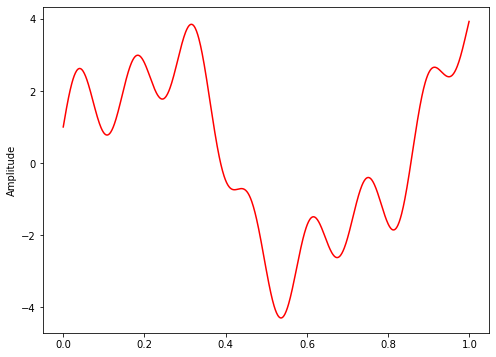

In [4]:
# sampling rate
sr = 1000
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.23
x = 3*np.sin(2*np.pi*freq*t)

freq = 3
x += np.cos(2*np.pi*freq*t)

freq = 7  
x += np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()


In [6]:
HR = estimate_HR(x)
print(HR)

1.190185546875
71.4111328125


# Linear regression

In [27]:
def get_coefficients(x,y):
    
    mX = sum(x)/len(x)
    mY = sum(y)/len(y)
    covXY = sum((x-mX)*(y-mY))
    varX = sum(((x-mX)**2))
    
    b1 = covXY/varX
    b0 = mY-b1*mX
    
    return b0,b1

In [28]:
# data
root = ET.parse("D:/dataset/angelo/angelo_gym/cms50_stream_handler.xml").getroot()
y = []
for child in root:
    rank = child.find('value1').text
    y.append(int(rank))
    
root = ET.parse("D:/dataset/angelo/angelo_resting/cms50_stream_handler.xml").getroot()
for child in root:
    rank = child.find('value1').text
    y.append(int(rank))
    
root = ET.parse("D:/dataset/angelo/angelo_rotation/cms50_stream_handler.xml").getroot()
for child in root:
    rank = child.find('value1').text
    y.append(int(rank))
    
root = ET.parse("D:/dataset/angelo/angelo_talk/cms50_stream_handler.xml").getroot()
for child in root:
    rank = child.find('value1').text
    y.append(int(rank))     
 
    
y = np.asarray(y)
mu, sigma = 0, 2 
# creating a noise with the same dimension as the dataset (2,2) 
noise = np.random.normal(mu, sigma, len(y)) 
x = noise + y

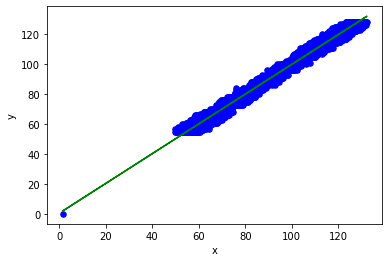

In [29]:
# estimating coefficients
b = get_coefficients(x, y)
plt.scatter(x, y, color = "b",
       marker = "o", s = 30)

# predicted response vector
y_pred = b[0] + b[1]*x

# plotting the regression line
plt.plot(x, y_pred, color = "g")

# putting labels
plt.xlabel('x')
plt.ylabel('y')

# function to show plot
plt.show()

# HR after regression

In [30]:
print(b)
finalHR = b[0] + b[1]*HR
print(HR,finalHR)

(0.48350481888860486, 0.9946020160629372)
71.4111328125 71.50916148353927


In [34]:
k = np.random.random(1024)
np.allclose(FFT(k), )

True